In [2]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab06.ok')

Assignment: Assessing Models: Examining the Therapeutic Touch
OK, version v1.18.1



## Lab 6: Examining the Therapeutic Touch

Welcome to Lab 6!

After such an extensive introduction to programming for data science, we are finally moving into the section of the course where we can apply our new skils to answer real questions.  

In this lab, we'll use testing techniques that were introduced in lecture to test the idea of the therapeutic touch, the idea that some practitioner can feel and massage your human energy field. 

In [3]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# These lines load the tests.
from client.api.notebook import Notebook
ok = Notebook('lab06.ok')
_ = ok.submit()

Assignment: Assessing Models: Examining the Therapeutic Touch
OK, version v1.18.1



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab06.ipynb'.
Submit... 0.0% complete
Could not submit: Late Submission of cal/data8/sp20/lab06



### What is the Therapeutic Touch

The Therapeutic Touch (TT) is the idea that everyone can feel the Human Energy Field (HEF) around individuals.  Those who practice TT have described different people's HEFs as "warm as Jell-O" and "tactile as taffy." 

TT was a popular technique used throughout the 20th century that was toted as a great way to bring balance to a person's health. Certain practitioners claim they have the ability to feel the HEF and can massage it in order to promote health and relaxation in individuals.

### Emily Rosa

[Emily Rosa](https://en.wikipedia.org/wiki/Emily_Rosa) was a 4th grade student who was very familiar with the world of TT, thanks to her parents, who were both medical practitioners and skeptics of TT.

For her 4th grade science fair project, Emily decided to test whether or not TT practitioners could truly interact with a person's HEF. She later went on to publish her work in TT, becoming the youngest person to have a research paper published in a peer reviewed medical journal.

### Emily's Experiment

Emily's experiment was clean, simple, and effective. Due to her parents' occupations in the medical field, she had wide access to people who claimed to be TT practitioners. 

Emily took 21 TT practitioners and used them for her science experiment. She would take a TT practitioner and ask them to extend their hands through a screen (which they can't see through). Emily would be on the other side and would flip a fair coin. Depending on how the coin landed, she would put out either her left hand or her right hand. The TT practitioner would then have to answer which hand Emily put out. If a pracitioner could truly interact with a person's HEF, it would be expected that they answered correctly.

Overall, through 210 samples, the practitioner picked the correct hand 44% of the time. 

Emily's main goal here was to test whether or not the TT practicioners' guesses were random, like the flip of a coin. In most medical experiments, this is the norm. We want to test whether or not the treatment has an effect, *not* whether or not the treatment actually works. 

We will now begin to formulate this experiment in terms of the terminology we learned in this course. 

**Question 1**: Describe Emily’s model for how likely the TT practitioners are to choose the correct hand. What alternative model is her model meant to discredit? Discuss with students around you to come to a conclusion. Check in with a TA or LA if you are stuck.

<!--
BEGIN QUESTION
name: q1_1
-->

Emily's model for how likely the TT practitioners are to choose the correct hand is that the TT practitioners are likely to predict the hand correctly randomly, like a flip of a coin; in very large samples, this percentage would be close to 50%. Emily is trying to discredit the model that TT practitioners can sense HEF and therefore guess the hand correctly the majority of the time. 

**Question 2:** Remember that the practitioner got the correct answer 44% (0.44) of the time. According to Emily's model, on average, what proportion of times do we expect the practitioner to guess the correct hand? Make sure your answer is between 0 and 1. 

<!--
BEGIN QUESTION
name: q1_2
-->

In [4]:
expected_proportion_correct = 0.5
expected_proportion_correct

0.5

In [5]:
ok.grade("q1_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



The goal now is to see if our deviation from this expected proportion of correct answers is due to something other than chance. 

**Question 3:** We usually use a statistic to help determine which model the evidence points towards. What is a statistic that we can use to compare outcomes under Emily’s model to what was observed? Assign `valid_stat` to an array of integer(s) representing test statistics that Emily can use: 

1. The difference between the expected percent correct and the actual percent correct
2. The absolute difference between the expected percent correct and the actual percent correct
3. The sum of the expected percent correct and the actual percent correct


<!--
BEGIN QUESTION
name: q1_3
-->

In [6]:
valid_stat = make_array(2)
valid_stat

array([2])

In [7]:
ok.grade("q1_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4:** Why is the statistic from Question 3 the best choice for comparing outcomes in Emily's experiment? How does it relate to the models you defined in question 1?

<!--
BEGIN QUESTION
name: q1_4
-->

The statistic from Question 3 is the best choice because we want to see the difference between the observed percentage and the expected percentage; by doing so, we would be able to collect data on how accurate TT practitioners were. However, we want the absolute difference because we want to see how far the actual percent correct deviates from the expected percent--we do not want to worry about the sign of the difference but rather simply the magnitude.


**Question 5:** Define the function `statistic` which takes in an expected proportion and an actual proportion, and returns the value of the statistic chosen in Question 3. Assume that the argument takes in proportions, but  return your answer as a percentage. 

*Hint:* Remember we are asking for a **percentage**, not a proportion. 

<!--
BEGIN QUESTION
name: q1_5
-->

In [8]:
def statistic(expected_prop, actual_prop):
    return abs(expected_prop - actual_prop) * 100

In [9]:
ok.grade("q1_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6:** Use your newly defined function to calculate the observed statistic from Emily's experiment. 

<!--
BEGIN QUESTION
name: q1_6
-->

In [10]:
observed_statistic = statistic(0.5, 0.44)
observed_statistic

6.0

In [11]:
ok.grade("q1_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Is this observed statistic consistent with what we might see under Emily’s model?**

In order to answer this question, we must simulate the experiment as though Emily's model was correct, and calculate our statistic for every simulation.

### `sample_proportions`

`sample_proportions` can be used to randomly sample from multiple categories when you know the proportion of data points that are expected to fall in each category. `sample_proportions` takes two arguments: the sample size and an array that contains the distribution of categories in the population (should sum to 1).

Consider flipping a fair coin, where the two outcomes (coin lands heads and coin lands tails) occur with an equal chance. We expect that half of all coin flips will land heads, and half of all coin flips will land tails.

Run the following cell to see the simulation of 10 flips of a fair coin. Let the first item of `coin_proportions` be the proportion of heads and the second item of `coin_proportions` be the proportion of tails.

In [12]:
coin_proportions = make_array(0.5, 0.5) 
ten_flips = sample_proportions(10, coin_proportions)
ten_flips

array([0.6, 0.4])

`sample_proportions` returns an array that is the same length as the proportion array that is passed through. It contains the proportion of each category that appears in the sample. 

In our example, the first item of `ten_flips` is the simulated proportion of heads and the second item of `ten_flips` is the simulated proportion of tails.

In [13]:
simluated_proportion_heads = ten_flips.item(0)
simluated_proportion_tails = ten_flips.item(1)

print("In our simluation, " + str(simluated_proportion_heads) + " of flips were heads and " \
      + str(simluated_proportion_tails) + " of flips were tails.")

In our simluation, 0.6 of flips were heads and 0.4 of flips were tails.


**Question 7:** To begin simulating, we should start by creating a representation of Emily's model to use for our simulation. This will be an array with two items in it. The first item should be the proportion of times, assuming that Emily’s model was correct, a TT practictioner picks the correct hand. The second item should be the proportion of times, under the same assumption, that the TT practitioner picks the incorrect hand. Assign `model_proportions` to this array. 

After this, we can simulate 210 hand choices, as Emily evaluated in real life, and find a single statistic to summarize this instance of the simulation. Use the `sample_proportions` function and assign the proportion of correct hand choices (out of 210) to `simulation_proportion_correct`. Lastly, use your statistic function to assign `one_statistic`  to the value of the statistic for this one simulation.

*Hint:* `sample_proportions` usage can be found [here](http://data8.org/su19/python-reference.html).

<!--
BEGIN QUESTION
name: q1_7
-->

In [14]:
model_proportions = make_array(0.5, 0.5)
simulation_proportion_correct = sample_proportions(210, model_proportions).item(0)
one_statistic = statistic(0.5, simulation_proportion_correct)
one_statistic

0.9523809523809545

In [15]:
ok.grade("q1_7");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed



**Question 8:** Let's now see what the distribution of statistics is actually like under Emily's model. 

Define the function `simulation_and_statistic` to take in the `model_proportions` array and the expected proportion of times a TT practitioner would guess a hand correctly under Emily's model. The function should simulate Emily running through the experiment 210 times and return the statistic of this one simulation. 

*Hint:* This should follow the same pattern as the code you did in the previous problem.  

In [16]:
def simulation_and_statistic(model_proportions, expected_proportion_correct):
    '''Simulates 210 TT hand choices under Emily’s model. 
    Returns one statistic from the simulation.'''
    simulation_proportion_correct = sample_proportions(210, model_proportions).item(0)
    one_statistic = statistic(expected_proportion_correct, simulation_proportion_correct)
    return one_statistic

Using this function, assign `simulated_statistics` to an array of 1000 statistics that you calculated under the assumption that Emily's model was true.

<!--
BEGIN QUESTION
name: q1_8
-->

In [21]:
num_repetitions = 1000

simulated_statistics = np.array([])

for i in np.arange(num_repetitions):
    simulated_statistics = np.append(simulated_statistics, simulation_and_statistic(model_proportions, expected_proportion_correct))

In [22]:
ok.grade("q1_8");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



Let's view the distribution of the simulated statistics under Emily's model, and visually compare where the observed statistic lies relative to the simulated statistics.

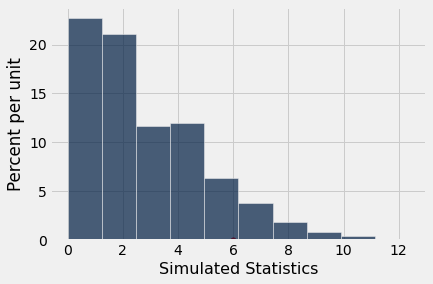

In [23]:
t = Table().with_column('Simulated Statistics', simulated_statistics)
t.hist()
plt.scatter(observed_statistic, 0, color='red', s=30);

We can make a visual argument as to whether we believe the observed statistic is consistent with Emily’s model. Here, since larger values of the test statistic suggest the alternative model (where the chance of guessing the correct hand is something other than 50%), we can formalize our analysis by finding what proportion of simulated statistics were as large or larger than our observed test statistic (the area at or to the right of the observed test statistic). If this area is small enough, we’ll declare that the observed data are inconsistent with our simulated model.

**Question 9:** Calculate the proportion of simulated statistics greater than or equal to the observed statistic. 

<!--
BEGIN QUESTION
name: q1_9
-->

In [25]:
proportion_greater_or_equal = sum(simulated_statistics >= observed_statistic)/num_repetitions
proportion_greater_or_equal

0.087

In [26]:
ok.grade("q1_9");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



By convention, we often compare the proportion we just calculated to 0.05. If the proportion of simulated statistics greater than or equal to the observed statistic is sufficiently small (less than or equal to 0.05), then this is evidence against Emily's model. Otherwise, we don’t have any reason to doubt Emily’s model. 

This should help you make your own conclusions about Emily Rosa's experiment. 

Therapeutic touch fell out of use after this experiment, which was eventually accepted into one of the premier medical journals. TT practitioners hit back and accused Emily and her family of tampering with the results, while some claimed that Emily's bad spiritual mood towards therapeutic touch made it difficult to read her HEF. Whatever it may be, Emily's experiment is a classic example about how anyone, with the right resources, can test anything they want!

Think to yourself and be prepared to talk with your learning assistant and TA about the following questions as you get checked off: 

1. Is the data more consistent with Emily' model (practioners were randomly guessing)?
2. What does this mean in terms of Emily's experiment? Do the TT practitioners' answers follow an even chance model or is there something else at play? 

Lastly, make sure to run all the tests (the next cell has a shortcut for that), save your work, and run the submit cell before you leave lab to ensure your assignment gets graded! 

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

In [ ]:
_ = ok.submit()